<a href="https://colab.research.google.com/github/SabilarRosyad/PCVK_GENAP_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

Praktikum

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
- Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

- Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## Konvulasi tanpa library
Membuat fungsi konvulasi

Fungsi konvolusi yang dibuat memiliki parameter berupa:

1.  citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambakan pada citra

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [ ]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img_m,cv.COLOR_BGR2GRAY)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

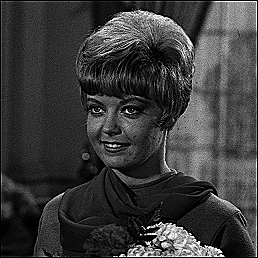

In [ ]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

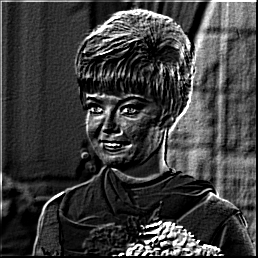

In [ ]:
#Emboss

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

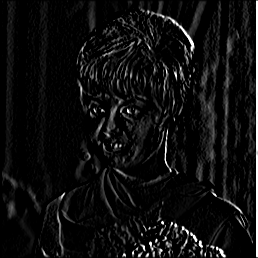

In [ ]:
#Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

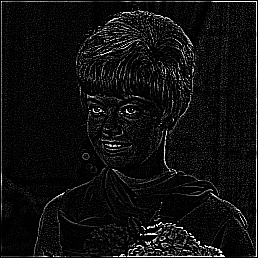

In [ ]:
#Canny Edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

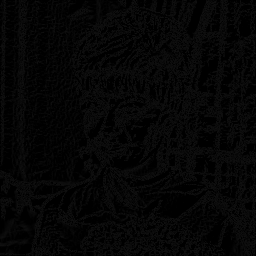

In [ ]:
#Prewitt Edge Detection

kernel_prewitt_vertical = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

kernel_prewitt_horizontal = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

result_vertical = cv.filter2D(img_gray, -1, kernel_prewitt_vertical)
result_horizontal = cv.filter2D(img_gray, -1, kernel_prewitt_horizontal)
result_combined = np.sqrt(result_vertical**2 + result_horizontal**2).astype(np.uint8)

cv2_imshow(result_combined)

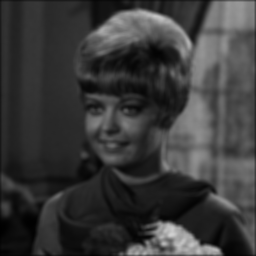

In [ ]:
#5x5 Gaussian Blur

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

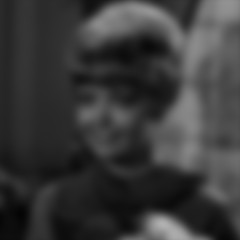

In [ ]:
#21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

##Tugas

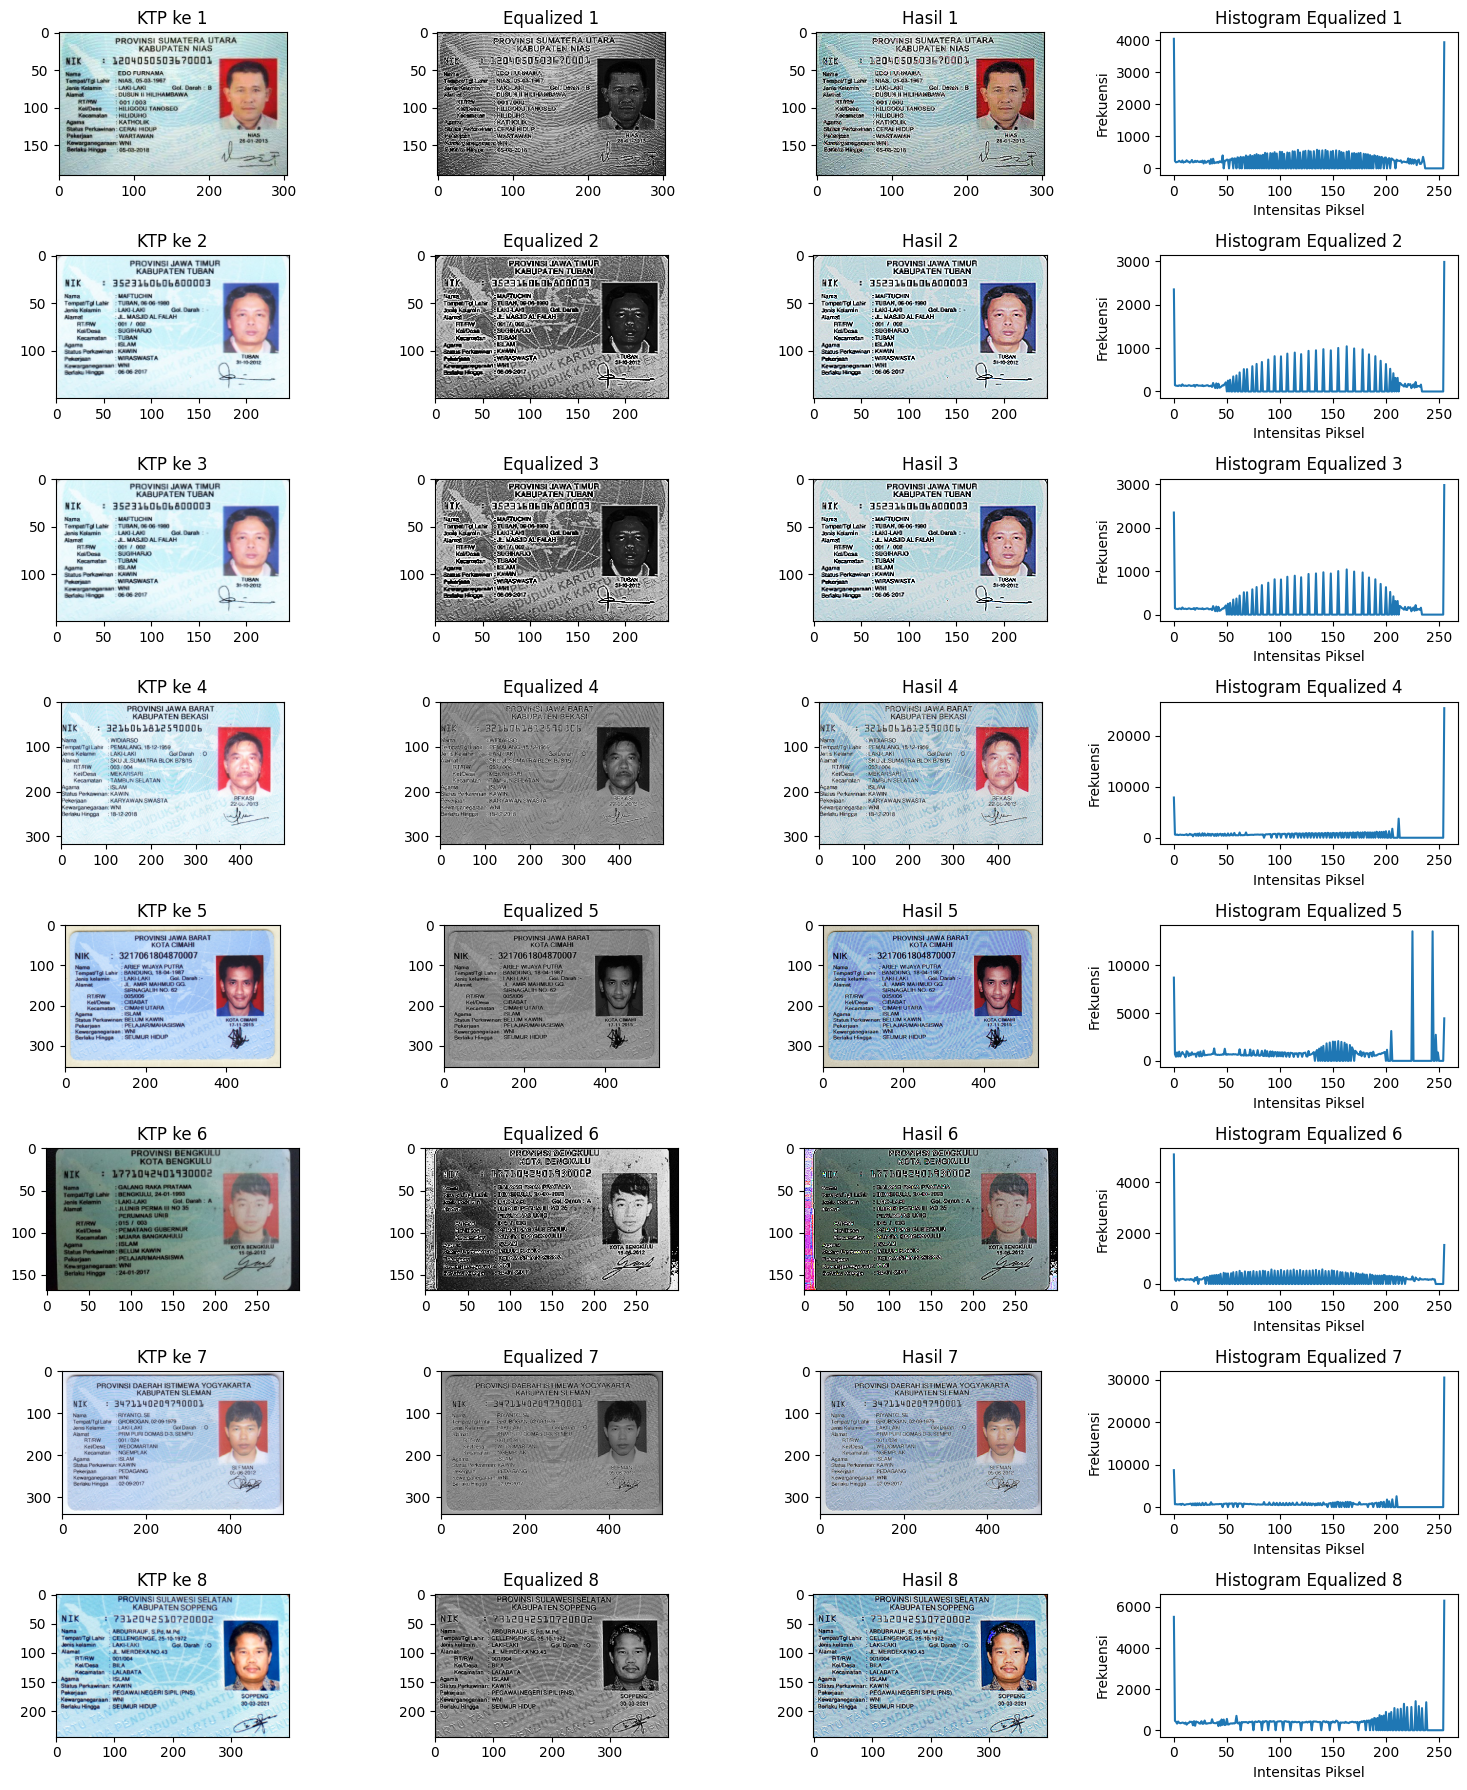

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# path folder
folder_path = '/content/drive/MyDrive/PCVK/KTP_More'

# daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # mengubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # brightness
    hsv = cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v - 30, 0, 255)  # Penyesuaian kecerahan
    hsv = cv2.merge((h, s, v))
    brightness_adjusted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # sharpen
    kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # melakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # menampilkan gambar asli dengan label pada kolom ke-1
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP ke {i+1}')

    # menampilkan gambar hasil equalisasi dengan label pada kolom ke-2
    axs[i, 1].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Equalized {i+1}')

   # menampilkan gambar yang telah diolah dengan label pada kolom ke-3
    axs[i, 2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Hasil {i+1}')

    # menghitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # menampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()